In [217]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os
import pandas as pd

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [303]:
train_df = pd.read_csv("train_2016_v2.csv", parse_dates=["transactiondate"])

In [259]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 3 columns):
parcelid           90275 non-null int64
logerror           90275 non-null float64
transactiondate    90275 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 2.1 MB


In [300]:
test_df = pd.read_csv("sample_submission.csv")

In [308]:
test_df = test_df.rename(index=str, columns={"ParcelId": "parcelid"})

In [199]:
properties_2016_df = pd.read_csv("properties_2016.csv")

In [304]:
train_df = pd.merge(train_df, properties_2016_df, on='parcelid', how='left')

In [309]:
test_df = pd.merge(test_df, properties_2016_df, on='parcelid', how='left')

In [312]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2985217 entries, 0 to 2985216
Data columns (total 64 columns):
parcelid                        int64
201610                          int64
201611                          int64
201612                          int64
201710                          int64
201711                          int64
201712                          int64
airconditioningtypeid           float64
architecturalstyletypeid        float64
basementsqft                    float64
bathroomcnt                     float64
bedroomcnt                      float64
buildingclasstypeid             float64
buildingqualitytypeid           float64
calculatedbathnbr               float64
decktypeid                      float64
finishedfloor1squarefeet        float64
calculatedfinishedsquarefeet    float64
finishedsquarefeet12            float64
finishedsquarefeet13            float64
finishedsquarefeet15            float64
finishedsquarefeet50            float64
finishedsquarefeet6  

In [311]:
# to make this notebook's output identical at every run
np.random.seed(42)

In [264]:
corr_matrix = train_df.corr()

In [265]:
corr_matrix["logerror"].sort_values(ascending=False)

logerror                        1.000000
basementsqft                    0.253395
yardbuildingsqft26              0.086179
finishedsquarefeet12            0.041922
calculatedfinishedsquarefeet    0.038784
finishedsquarefeet6             0.036847
finishedsquarefeet13            0.034715
threequarterbathnbr             0.034069
fireplacecnt                    0.033235
calculatedbathnbr               0.029448
fullbathcnt                     0.028845
bathroomcnt                     0.027889
garagecarcnt                    0.026531
finishedfloor1squarefeet        0.026242
bedroomcnt                      0.025467
garagetotalsqft                 0.023888
finishedsquarefeet50            0.023619
structuretaxvaluedollarcnt      0.022085
finishedsquarefeet15            0.019327
yearbuilt                       0.017312
numberofstories                 0.013075
censustractandblock             0.008892
rawcensustractandblock          0.008376
fips                            0.008363
taxvaluedollarcn

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000003939D278>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000004EC985F8>]], dtype=object)

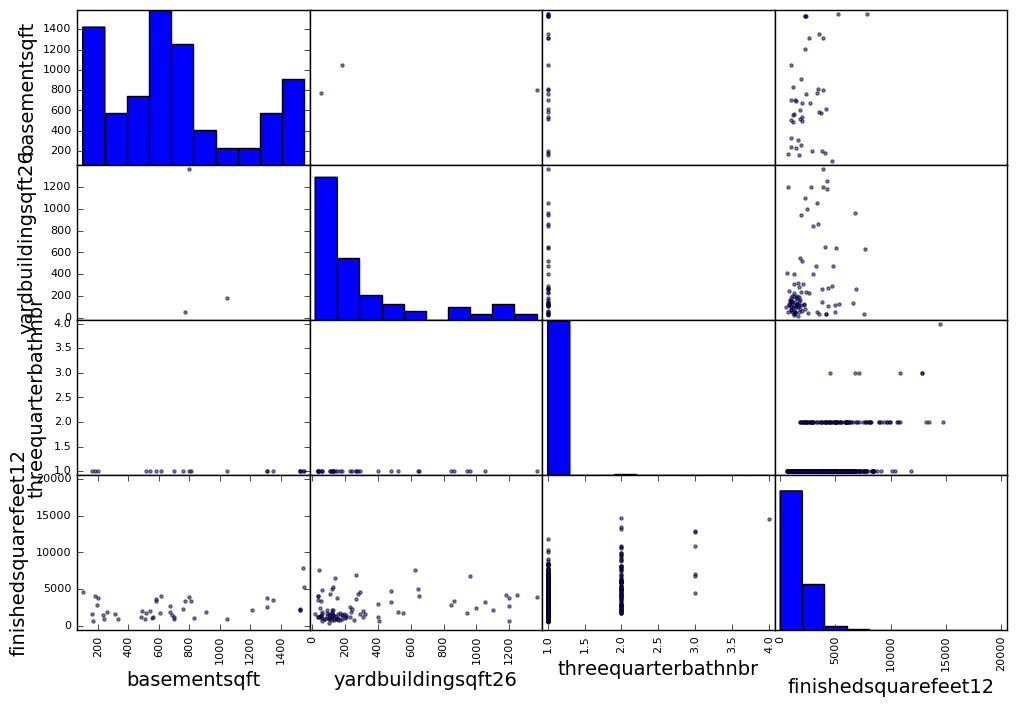

In [266]:
# from pandas.tools.plotting import scatter_matrix # For older versions of Pandas
from pandas.tools.plotting import scatter_matrix

attributes = ["basementsqft", "yardbuildingsqft26", "threequarterbathnbr",
              "finishedsquarefeet12"]
scatter_matrix(train_df[attributes], figsize=(12, 8))


### Prepare the data for Machine Learning algorithms

In [267]:
sample_incomplete_rows = train_df[train_df.isnull().any(axis=1)].head()
sample_incomplete_rows

,parcelid,logerror,transactiondate,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1.0,NaN,NaN,2.0,3.0,NaN,4.0,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,NaN,NaN,NaN,3.5,4.0,NaN,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1.0,NaN,NaN,3.0,2.0,NaN,4.0,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1.0,NaN,NaN,2.0,2.0,NaN,4.0,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,NaN,NaN,NaN,2.5,4.0,NaN,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [268]:
Blanks = train_df.isnull().sum() / len(train_df)
Blanks

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.681185
architecturalstyletypeid        0.997109
basementsqft                    0.999524
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingclasstypeid             0.999823
buildingqualitytypeid           0.364564
calculatedbathnbr               0.013093
decktypeid                      0.992711
finishedfloor1squarefeet        0.924054
calculatedfinishedsquarefeet    0.007322
finishedsquarefeet12            0.051831
finishedsquarefeet13            0.999634
finishedsquarefeet15            0.960521
finishedsquarefeet50            0.924054
finishedsquarefeet6             0.995336
fips                            0.000000
fireplacecnt                    0.893581
fullbathcnt                     0.013093
garagecarcnt                    0.668380
garagetotalsqft                 0.668380
hashottuborspa  

In [269]:
#Drop fields with over 75% NANs
train_df = train_df.drop(['taxdelinquencyyear', 'taxdelinquencyflag', 'fireplaceflag', 'yardbuildingsqft26', 
                       'yardbuildingsqft17', 'typeconstructiontypeid', 'storytypeid', 'poolsizesum', 
                       'pooltypeid10', 'pooltypeid2', 'hashottuborspa',
                       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6',
                       'decktypeid', 'finishedfloor1squarefeet', 'buildingclasstypeid', 
                       'architecturalstyletypeid', 'basementsqft', 'architecturalstyletypeid',
                       'threequarterbathnbr', 'fireplacecnt', 'poolcnt', 'pooltypeid7', 'numberofstories'], axis = 1)



In [270]:
Blanks = train_df.isnull().sum() / len(train_df)
Blanks

parcelid                        0.000000
logerror                        0.000000
transactiondate                 0.000000
airconditioningtypeid           0.681185
bathroomcnt                     0.000000
bedroomcnt                      0.000000
buildingqualitytypeid           0.364564
calculatedbathnbr               0.013093
calculatedfinishedsquarefeet    0.007322
finishedsquarefeet12            0.051831
fips                            0.000000
fullbathcnt                     0.013093
garagecarcnt                    0.668380
garagetotalsqft                 0.668380
heatingorsystemtypeid           0.378787
latitude                        0.000000
longitude                       0.000000
lotsizesquarefeet               0.112434
propertycountylandusecode       0.000011
propertylandusetypeid           0.000000
propertyzoningdesc              0.354052
rawcensustractandblock          0.000000
regionidcity                    0.019972
regionidcounty                  0.000000
regionidneighbor

In [271]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90275 entries, 0 to 90274
Data columns (total 35 columns):
parcelid                        90275 non-null int64
logerror                        90275 non-null float64
transactiondate                 90275 non-null datetime64[ns]
airconditioningtypeid           28781 non-null float64
bathroomcnt                     90275 non-null float64
bedroomcnt                      90275 non-null float64
buildingqualitytypeid           57364 non-null float64
calculatedbathnbr               89093 non-null float64
calculatedfinishedsquarefeet    89614 non-null float64
finishedsquarefeet12            85596 non-null float64
fips                            90275 non-null float64
fullbathcnt                     89093 non-null float64
garagecarcnt                    29937 non-null float64
garagetotalsqft                 29937 non-null float64
heatingorsystemtypeid           56080 non-null float64
latitude                        90275 non-null float64
longit

In [272]:
#remove categorical variables
train_df = train_df.drop(['propertyzoningdesc', 'propertycountylandusecode', 'transactiondate', 'parcelid'], axis = 1)

In [273]:
num_attribs = list(train_df)
num_attribs

['logerror',
 'airconditioningtypeid',
 'bathroomcnt',
 'bedroomcnt',
 'buildingqualitytypeid',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'garagecarcnt',
 'garagetotalsqft',
 'heatingorsystemtypeid',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidneighborhood',
 'regionidzip',
 'roomcnt',
 'unitcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock']

In [274]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [275]:
train_df_labels = train_df['logerror'].values

In [276]:
train_df = train_df.drop(['logerror'], axis = 1)

In [277]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer

num_attribs = list(train_df)

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


In [278]:
train_df_prepared = num_pipeline.fit_transform(train_df)

In [279]:
train_df_prepared

array([[-0.15115791, -0.27828682, -0.02755836, ..., -0.1021705 ,
         0.10996366, -0.58606834],
       [-0.15115791,  1.21534222,  0.83717255, ..., -0.09803808,
         0.6096462 , -0.56117457],
       [-0.15115791,  0.71746587, -0.89228927, ..., -0.55038018,
         0.80434332, -0.56857702],
       ..., 
       [-0.15115791, -0.27828682,  0.83717255, ..., -0.65481196,
        -0.59342075, -0.57010013],
       [-0.15115791, -0.27828682, -0.89228927, ..., -0.61288843,
        -0.54079757, -0.56183814],
       [-0.15115791, -1.27403951, -0.02755836, ..., -0.45333184,
        -0.50052777, -0.56464926]])

In [280]:
train_df_prepared.shape

(90275L, 30L)

# Select and train a model

In [281]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_df_prepared, train_df_labels, test_size=0.3, random_state=42)

In [282]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [283]:
from sklearn.metrics import mean_squared_error

lin_train_predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, lin_train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.16019487565336918

In [284]:
from sklearn.metrics import mean_absolute_error

lin_mae = mean_absolute_error(y_train, lin_train_predictions)
lin_mae

0.068438486050928588

In [285]:
from sklearn.metrics import mean_absolute_error

lin_test_predictions = lin_reg.predict(X_test)
lin_mae_test = mean_absolute_error(y_test, lin_test_predictions)
lin_mae_test

0.068689047645567214

In [286]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=42,
           splitter='best')

In [295]:
DT_predictions = tree_reg.predict(X_train)
DT_mae_train = mean_absolute_error(y_train, DT_predictions)
DT_mae_train

0.00012411893609197064

In [296]:
DT_test_predictions = tree_reg.predict(X_test)
DT_mae_test = mean_absolute_error(y_test, DT_test_predictions)
DT_mae_test

0.11300482713633399

In [291]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(random_state=42)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=10, n_jobs=1, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [297]:
from sklearn.metrics import mean_absolute_error

RF_predictions = forest_reg.predict(X_train)
RF_mae_train = mean_absolute_error(y_train, RF_predictions)
RF_mae_train

0.033704862229670153

In [298]:
RF_test_predictions = forest_reg.predict(X_test)
RF_mae_test = mean_absolute_error(y_test, RF_test_predictions)
RF_mae_test

0.083238626479372191

In [316]:
# Include same features for training and test set
test_df = test_df.drop(['propertyzoningdesc', 'propertycountylandusecode', 'parcelid',
                        'taxdelinquencyyear', 'taxdelinquencyflag', 'fireplaceflag', 'yardbuildingsqft26', 
                       'yardbuildingsqft17', 'typeconstructiontypeid', 'storytypeid', 'poolsizesum', 
                       'pooltypeid10', 'pooltypeid2', 'hashottuborspa',
                       'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6',
                       'decktypeid', 'finishedfloor1squarefeet', 'buildingclasstypeid', 
                       'architecturalstyletypeid', 'basementsqft', 'architecturalstyletypeid',
                       'threequarterbathnbr', 'fireplacecnt', 'poolcnt', 'pooltypeid7', 'numberofstories', '201610',
                        '201611','201612', '201710', '201711', '201712'], axis = 1)

In [318]:
test_df.shape

(2985217, 30)

In [320]:
# prepare test data for machine learning
num_attribs_test = list(test_df)

num_pipeline_test = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])


In [321]:
test_df_prepared = num_pipeline.fit_transform(test_df)

In [322]:
test_df_prepared.shape

(2985217L, 30L)

In [323]:
RF_final_predictions = forest_reg.predict(test_df_prepared)

In [325]:
submission_file = pd.read_csv('sample_submission.csv') 
for column in submission_file.columns[submission_file.columns != 'ParcelId']:
    submission_file[column] = RF_final_predictions

In [326]:
submission_file.to_csv('RF_final_predictions.csv', index=False, float_format='%.4f')